<a href="https://colab.research.google.com/github/ruvsena/Data_Scraping_Sentiment_Analyze_Twitter_X/blob/master/CFTR2_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense,Conv2D,Dropout
import pandas as pd
from tensorflow.keras import layers,models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Excel dosyasını oku
veri_seti = pd.read_excel('/content/CFTR2_dataset1.xlsx')
# Sütun isimlerini yazdır
print(veri_seti.columns)

Index(['Variant cDNA name_0', 'Variant cDNA name_1', 'Variant cDNA name_2',
       'Variant cDNA name_3', 'Variant cDNA name_4', 'Variant cDNA name_5',
       'Variant cDNA name_6', 'Variant cDNA name_7', 'Variant cDNA name_8',
       'Variant cDNA name_9', 'Variant protein name_0',
       'Variant protein name_1', 'Variant protein name_2',
       'Variant protein name_3', 'Variant protein name_4',
       'Variant protein name_5', 'Variant protein name_6',
       'Variant protein name_7', 'Variant protein name_8',
       'Variant legacy name_0', 'Variant legacy name_1',
       'Variant legacy name_2', 'Variant legacy name_3',
       'Variant legacy name_4', 'Variant legacy name_5',
       'Variant legacy name_6', 'Variant legacy name_7',
       'Variant legacy name_8', 'rsID_0', 'rsID_1', 'rsID_2', 'rsID_3',
       'rsID_4', 'rsID_5', 'rsID_6', 'rsID_7', 'rsID_8', '# alleles in CFTR2',
       'Allele frequency in CFTR2\n (of 142,036 identified variants)*',
       '% pancreatic insuffic

In [ ]:
X = veri_seti.iloc[:, :39]
y = veri_seti.iloc[:, -5:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

### Basit CNN Modeli

In [ ]:
model = Sequential([
    layers.Reshape((39, 1), input_shape=(39,)),  # Reshape the input to (batch_size, timesteps, features)
    Conv1D(32, activation='relu',kernel_size=3),
    MaxPooling1D(2),
    Conv1D(64, activation='relu',kernel_size=3),
    MaxPooling1D(2),
    Conv1D(64,  activation='relu',kernel_size=3),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

In [ ]:

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history=model.fit(X_train, y_train, validation_split=0.1,epochs=100, batch_size=64)

Epoch 1/100
37/37 [==============================] - 2s 17ms/step - loss: 0.0384 - accuracy: 0.4583 - val_loss: 0.0379 - val_accuracy: 0.4183
Epoch 2/100
37/37 [==============================] - 0s 12ms/step - loss: 0.0382 - accuracy: 0.4159 - val_loss: 0.0385 - val_accuracy: 0.4068
Epoch 3/100
37/37 [==============================] - 0s 9ms/step - loss: 0.0382 - accuracy: 0.4219 - val_loss: 0.0387 - val_accuracy: 0.4030
Epoch 4/100
37/37 [==============================] - 0s 9ms/step - loss: 0.0381 - accuracy: 0.5231 - val_loss: 0.0388 - val_accuracy: 0.2776
Epoch 5/100
37/37 [==============================] - 0s 11ms/step - loss: 0.0382 - accuracy: 0.4824 - val_loss: 0.0387 - val_accuracy: 0.4753
Epoch 6/100
37/37 [==============================] - 1s 15ms/step - loss: 0.0381 - accuracy: 0.4155 - val_loss: 0.0391 - val_accuracy: 0.3498
Epoch 7/100
37/37 [==============================] - 1s 15ms/step - loss: 0.0381 - accuracy: 0.4909 - val_loss: 0.0392 - val_accuracy: 0.3004
Epoch 8/

In [ ]:
model.evaluate(X_test, y_test)

21/21 [==============================] - 0s 5ms/step - loss: 0.0429 - accuracy: 0.3257


[0.042946960777044296, 0.32572299242019653]

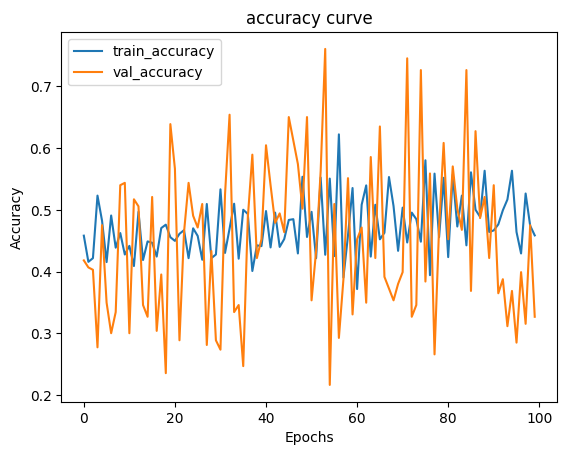

In [ ]:
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('accuracy curve')
plt.show()

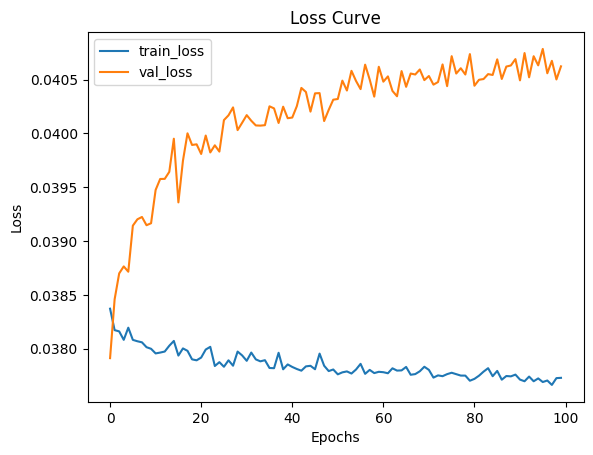

In [ ]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

## Karmaşık CNN Modeli

In [ ]:
model2 = Sequential([
    layers.Reshape((39, 1), input_shape=(39,)),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

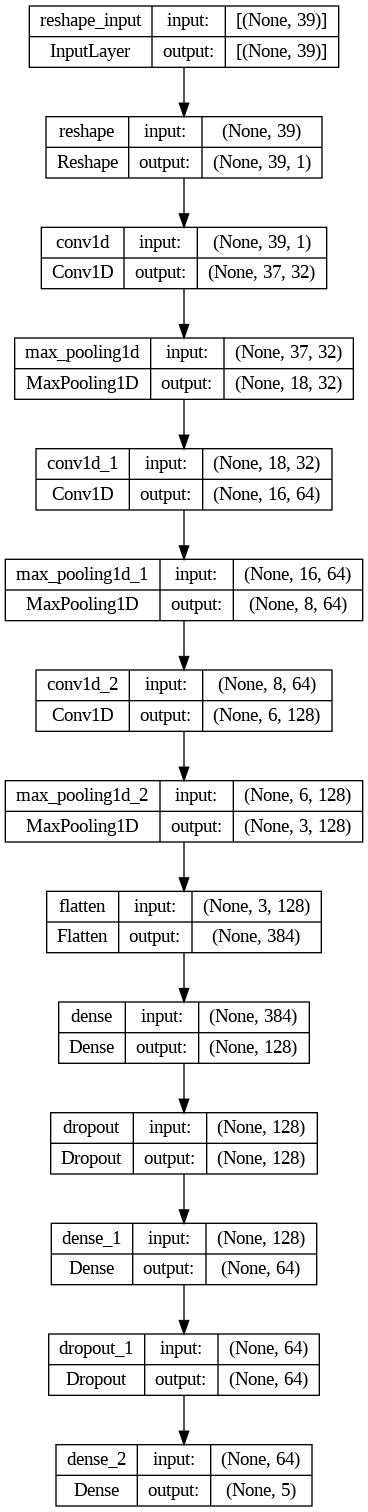

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 39, 1)             0         
                                                                 
 conv1d (Conv1D)             (None, 37, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 18, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 16, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 8, 64)             0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 6, 128)            2

In [ ]:
model2.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history2=model2.fit(X_train, y_train, validation_split=0.1,epochs=200, batch_size=64)

Epoch 1/200
37/37 [==============================] - 2s 17ms/step - loss: 0.0654 - accuracy: 0.1228 - val_loss: 0.0606 - val_accuracy: 0.0722
Epoch 2/200
37/37 [==============================] - 0s 10ms/step - loss: 0.0652 - accuracy: 0.1067 - val_loss: 0.0605 - val_accuracy: 0.0722
Epoch 3/200
37/37 [==============================] - 0s 10ms/step - loss: 0.0649 - accuracy: 0.0995 - val_loss: 0.0602 - val_accuracy: 0.0722
Epoch 4/200
37/37 [==============================] - 0s 11ms/step - loss: 0.0642 - accuracy: 0.1055 - val_loss: 0.0595 - val_accuracy: 0.0798
Epoch 5/200
37/37 [==============================] - 0s 10ms/step - loss: 0.0626 - accuracy: 0.1152 - val_loss: 0.0577 - val_accuracy: 0.0951
Epoch 6/200
37/37 [==============================] - 1s 14ms/step - loss: 0.0591 - accuracy: 0.1465 - val_loss: 0.0539 - val_accuracy: 0.1559
Epoch 7/200
37/37 [==============================] - 1s 18ms/step - loss: 0.0545 - accuracy: 0.2147 - val_loss: 0.0517 - val_accuracy: 0.1293
Epoch 

In [ ]:
model2.evaluate(X_test, y_test)

21/21 [==============================] - 0s 5ms/step - loss: 0.0432 - accuracy: 0.9726


[0.04319547861814499, 0.9726027250289917]

In [ ]:
y_pred = model2.predict(X_test)



21/21 [==============================] - 0s 2ms/step


In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test.values, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[549   8   7   3]
 [  0  24   0   0]
 [  0   0  10   0]
 [  0   0   0  56]]


In [ ]:
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       567
           1       0.75      1.00      0.86        24
           2       0.59      1.00      0.74        10
           3       0.95      1.00      0.97        56

    accuracy                           0.97       657
   macro avg       0.82      0.99      0.89       657
weighted avg       0.98      0.97      0.97       657



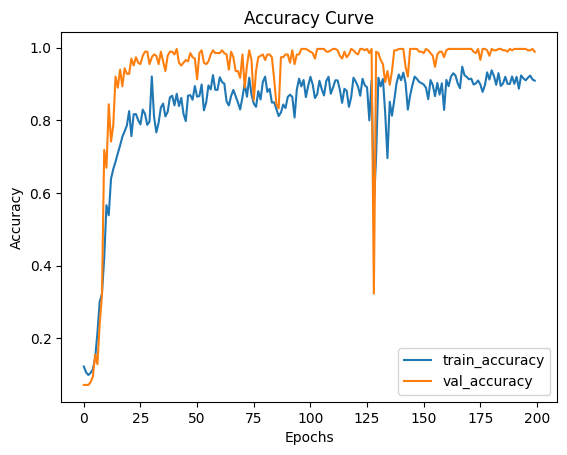

In [ ]:
plt.plot(history2.history['accuracy'],label='train_accuracy')
plt.plot(history2.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

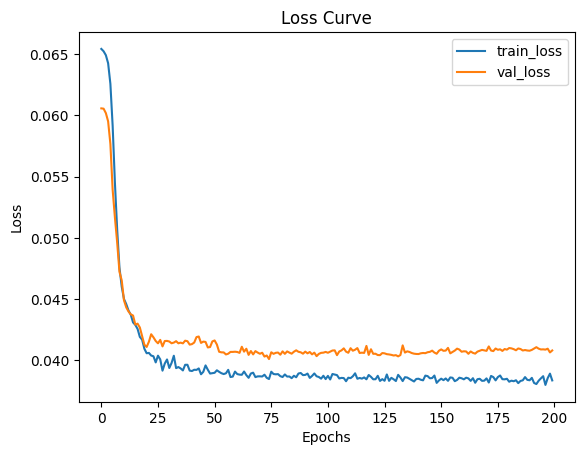

In [ ]:
plt.plot(history2.history['loss'],label='train_loss')
plt.plot(history2.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

In [ ]:
model3 = Sequential([
    layers.Reshape((39, 1), input_shape=(39,)),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

In [ ]:
model3.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history2=model2.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0387 - accuracy: 0.9196
Epoch 2/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0386 - accuracy: 0.9337
Epoch 3/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0386 - accuracy: 0.9428
Epoch 4/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0387 - accuracy: 0.9181
Epoch 5/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0387 - accuracy: 0.8933
Epoch 6/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0387 - accuracy: 0.9314
Epoch 7/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0388 - accuracy: 0.8948
Epoch 8/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0388 - accuracy: 0.9436
Epoch 9/100
41/41 [==============================] - 0s 11ms/step - loss: 0.0386 - accuracy: 0.8723
Epoch 10/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0388 - accuracy: 0.8994
Epoc

In [ ]:
model3.evaluate(X_test, y_test)

21/21 [==============================] - 0s 3ms/step - loss: 0.0641 - accuracy: 0.8539


[0.06405472755432129, 0.853881299495697]

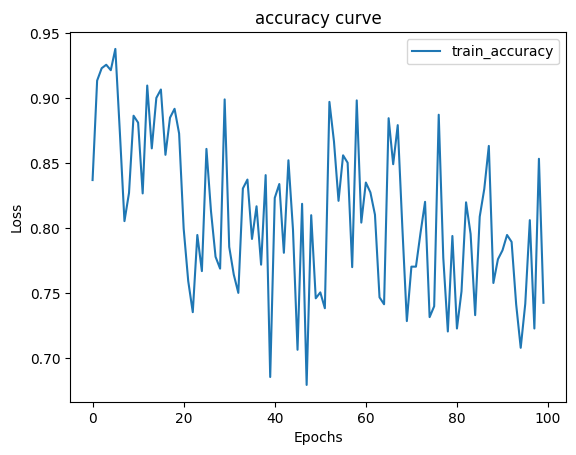

In [ ]:
plt.plot(history2.history['accuracy'],label='train_accuracy')
#plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('accuracy curve')
plt.show()

**tek katmanlı model**

In [ ]:
model3 = Sequential([
  Dense(1, activation='linear', input_shape=(39,))
])

model3.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
history3=model3.fit(X_train, y_train, epochs=150, batch_size=64)

Epoch 1/150
41/41 [==============================] - 0s 2ms/step - loss: 281645.5625 - mae: 24.1893
Epoch 2/150
41/41 [==============================] - 0s 2ms/step - loss: 256507.8281 - mae: 23.1601
Epoch 3/150
41/41 [==============================] - 0s 2ms/step - loss: 231052.2969 - mae: 22.1586
Epoch 4/150
41/41 [==============================] - 0s 2ms/step - loss: 210204.9219 - mae: 21.1702
Epoch 5/150
41/41 [==============================] - 0s 2ms/step - loss: 185227.3125 - mae: 20.1387
Epoch 6/150
41/41 [==============================] - 0s 2ms/step - loss: 167798.3438 - mae: 19.3293
Epoch 7/150
41/41 [==============================] - 0s 2ms/step - loss: 149513.1875 - mae: 18.3793
Epoch 8/150
41/41 [==============================] - 0s 2ms/step - loss: 131806.5625 - mae: 17.5038
Epoch 9/150
41/41 [==============================] - 0s 2ms/step - loss: 118959.0859 - mae: 16.7649
Epoch 10/150
41/41 [==============================] - 0s 2ms/step - loss: 105576.5000 - mae: 15.9730

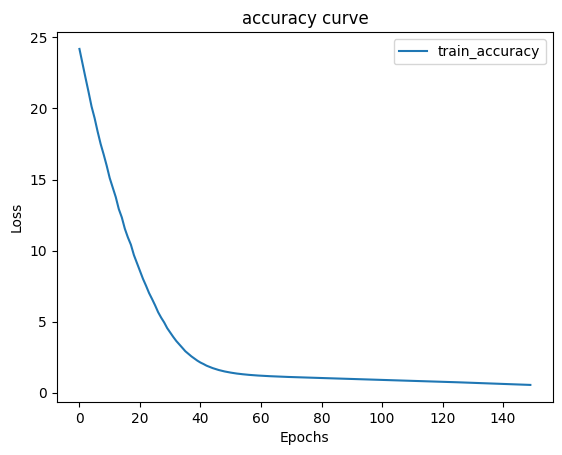

In [ ]:
plt.plot(history3.history['mae'],label='train_accuracy')
#plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('accuracy curve')
plt.show()

**Basit Model**

### **Ek şeyler**

In [ ]:
model.evaluate(X_test, y_test)

21/21 [==============================] - 1s 4ms/step - loss: 74.5979 - accuracy: 0.9431


[74.5979232788086, 0.9430745244026184]

In [ ]:

loss, mae = model.evaluate(X_test, y_test)
print('Test kaybı:', loss)
print('Ortalama mutlak hata:', mae)


21/21 [==============================] - 0s 2ms/step - loss: 8094247.5000 - accuracy: 0.8630
Test kaybı: 8094247.5
Ortalama mutlak hata: 0.8630136847496033


In [ ]:
#predictions = model.predict(X_test)
#accuracy = tf.keras.backend.mean(tf.keras.backend.equal(tf.keras.backend.argmax(y_test, axis=1), tf.keras.backend.argmax(predictions, axis=1)))
#print('Doğruluk:', accuracy)

21/21 [==============================] - 0s 2ms/step
Doğruluk: tf.Tensor(0.8630137, shape=(), dtype=float32)


In [ ]:
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
82/82 [==============================] - 2s 7ms/step - loss: 647909760.0000 - accuracy: 0.2519 - val_loss: 576119616.0000 - val_accuracy: 0.0852
Epoch 2/10
82/82 [==============================] - 0s 5ms/step - loss: 569079936.0000 - accuracy: 0.1117 - val_loss: 505119264.0000 - val_accuracy: 0.0852
Epoch 3/10
82/82 [==============================] - 0s 4ms/step - loss: 494296224.0000 - accuracy: 0.0983 - val_loss: 444455392.0000 - val_accuracy: 0.0365
Epoch 4/10
82/82 [==============================] - 0s 4ms/step - loss: 445304032.0000 - accuracy: 0.0823 - val_loss: 391117408.0000 - val_accuracy: 0.0365
Epoch 5/10
82/82 [==============================] - 0s 4ms/step - loss: 383914528.0000 - accuracy: 0.0835 - val_loss: 345857088.0000 - val_accuracy: 0.0365
Epoch 6/10
82/82 [==============================] - 0s 5ms/step - loss: 343735840.0000 - accuracy: 0.0629 - val_loss: 306943808.0000 - val_accuracy: 0.0365
Epoch 7/10
82/82 [==============================] - 1s 7ms/step 

In [ ]:
#score = model.evaluate(X_test, y_test)
#print('Test kaybı:', score[0])
#print('Test doğruluğu:', score[1])

21/21 [==============================] - 0s 4ms/step - loss: 192685216.0000 - accuracy: 0.0365
Test kaybı: 192685216.0
Test doğruluğu: 0.03652967885136604


In [ ]:
model2.save('cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
